In [ ]:
# timescales of all processes: stochastic_acc, shear_acc, scattering, escaping and radiative cooling
import numpy as np
import astropy.units as u
from astropy import constants as const
import matplotlib.pyplot as plt

#in cgs
m_e = (const.m_e.cgs).value
c= (const.c.cgs).value
e = (const.e.esu).value
sigma_sb = (const.sigma_sb.cgs).value
pi = np.pi
Lam_max = (1e18*(u.cm)).value

# B(uG), Reg(pc),rho(g/cm^3)
def Tscales(lgB,Reg,beta,lgN,lgrho):
    B0=(((10**lgB)*(u.uG)).to(u.G)).value
    rho = 10**lgrho # jet density(g/cm^3)
    xi=1
    q=5/3
    z=0
    T_cmb=2.72 # Kelvin
    Delta_r = ((Reg*(u.pc)).cgs).value
    Gamma_j = (1/(4*np.square(beta)))*np.square(np.log((1+beta)/(1-beta))) #averaged
    sigma_e = (8*pi/3)*np.square(e**2/(m_e*c**2))
    U_B = np.square(B0)/8*np.pi
    U_cmb = ((4*sigma_sb)/c)*T_cmb**4*(1+z)**4 # only CMB is considered
    U_rad = U_cmb
    f = U_rad/U_B
    beta_Alf = (B0/np.sqrt(4*pi*rho))/c # Velocity of Alfven wave 
    Gamma_Alf = 1/np.sqrt(1-beta_Alf**2)

    # energy range
    E_all = np.logspace(0,18,9000)*(u.eV) # selected energy range
    gamma_all = ((E_all.to(u.erg)).value)/(m_e*np.square(c)) #10**np.arange(min,max,0.1)

    # scattering timescales
    A_sc = xi**(-1)*Lam_max**(q-1)*c**(-1)*(m_e*np.square(c)/(e*B0))**(2-q)
    t_sc = A_sc*gamma_all**(2-q)

    # shear_acc
    A1=(2/15)*Gamma_j**4*np.square(c*(beta/Delta_r))*A_sc
    t_sh = 2*gamma_all**(q-2)/(A1*(6-q))

    # stochastic_acc
    A_st = (xi*c*Gamma_Alf**4*beta_Alf**2/(Lam_max)**(q-1))*(m_e*np.square(c)/(e*B0))**(q-2)
    t_st = (2/(A_st*(2+q)))*gamma_all**(2-q)

    # radiative cooling(SYN+IC)
    A2 = (sigma_e*np.square(B0)*(1+f))/(6*pi*m_e*c)
    t_cool = (A2*gamma_all)**(-1)

    # escaping
    A3 = ((3*np.square(Delta_r))/(2*np.square(c)))*A_sc**(-1)
    t_esc = A3*gamma_all**(q-2)


    return E_all,t_sh,t_st,t_cool,t_esc

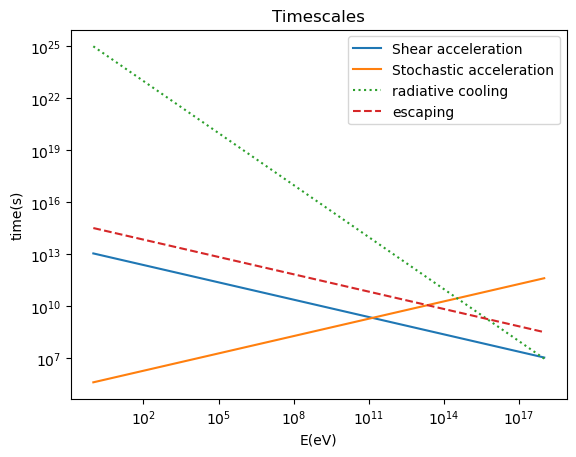

In [5]:
lgB=0.8
Reg=2.35
beta=0.92
lgN=46
lgrho=-29
E_all,t_sh,t_st,t_cool,t_esc = Tscales(lgB,Reg,beta,lgN,lgrho)
plt.figure()
plt.title('Timescales')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E(eV)')
plt.ylabel('time(s)')
plt.plot(E_all,t_sh,label='Shear acceleration')
plt.plot(E_all,t_st,label = 'Stochastic acceleration')
plt.plot(E_all,t_cool,label = 'radiative cooling',linestyle='dotted')
plt.plot(E_all,t_esc,label = 'escaping',linestyle = 'dashed')
plt.legend()
plt.show()